In [1]:
'''#Tools for DataSet manupulation
import pandas as pd
from collections import Counter
import numpy as np
import math
from scipy import stats
import random

#Pre Processing using sklearn
from sklearn import preprocessing

#Validation using sklearn
from sklearn.model_selection import ShuffleSplit, cross_val_score

#Regression Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor, LassoCV, ElasticNetCV, RidgeCV
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

#plots
import matplotlib.pyplot as plt'''

#handy functions from Data Wrangling activities
#import RentPredictionChallenge as wrangle
from RentPredictionChallenge import *

C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Shape of the data set before transforming :  (12132, 40)
Shape of the data set after transforming :  (12132, 44) 

Shape of the dataset before transformation :  (12132, 44)
Ignoring the columns.... []
Performing column transformations for : ['rent', 'cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles', 'bed', 'bath', 'halfbath', 'sqft', 'garage', 'yearbuilt', 'pool', 'fireplace', 'patio', 'lotsize', 'Census_MedianIncome', 'CollegeGrads', 'WhiteCollar', 'Schools', 'Unemployment', 'EmploymentDiversity', 'Census_Vacancy', 'Crime_Rate', 'HomePrice', 'x', 'y', 'z', 2015.25, 2015.5, 2015.75, 2016.25, 'Condo', 'Duplex', 'NA', 'Quadplex', 'SFR', 'Triplex']

Shape of the data set before min max scaling :  (12132, 44)

Shape of the data set post min max scaling :  (12132, 44)
Shape of the dataset after transformation :  (12132, 44)
I

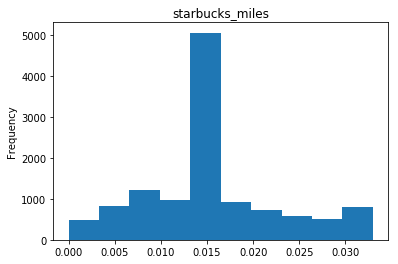


Shape of the data set before min max scaling :  (12132, 44)

Shape of the data set post min max scaling :  (12132, 44)


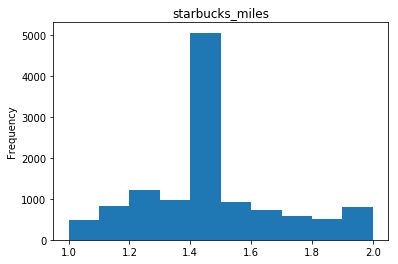


Train feature shape:  (12132, 43) (12132,)
Test feature shape:  (0, 43) (0,)


In [2]:
X,y,dummy_X,dummy_y = returnTrainTestSet(
                                boxCoxTranformation(preProcessTheData(readTheData('TestData_PA.csv'))),
                                .99999,
                                1986)

Initial df size (18203, 40)
Duplicates size (60, 40)
NaN columns : ['county', 'zipcode', 'address', 'property_type']
NaN columns (post fillna): []
Duplicates size (post fillna) (60, 40)
Duplicates without considering *time* feature :  (123, 40)
Post duplicates removal data set size :  (18080, 40)

Shape of the data set before to outlier removal :  (18080, 40)
Shape of the data set after outlier removal :  (18079, 40)

Shape of the data set before transforming :  (18079, 40)
Shape of the data set after transforming :  (18079, 44) 

Shape of the dataset before transformation :  (18079, 44)
Ignoring the columns.... []
Performing column transformations for : ['rent', 'cemetery_dist_miles', 'nationalhighway_miles', 'railline_miles', 'starbucks_miles', 'walmart_miles', 'hospital_miles', 'physician_dist_miles', 'dentist_dist_miles', 'opt_dist_miles', 'vet_dist_miles', 'farmers_miles', 'bed', 'bath', 'halfbath', 'sqft', 'garage', 'yearbuilt', 'pool', 'fireplace', 'patio', 'lotsize', 'Census_Me

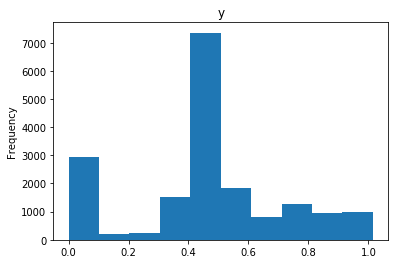


Shape of the data set before min max scaling :  (18079, 44)

Shape of the data set post min max scaling :  (18079, 44)


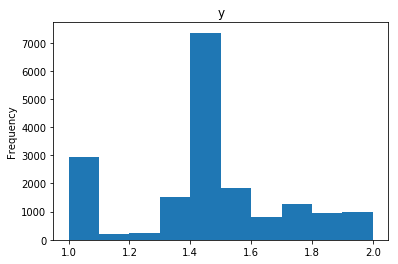


Train feature shape:  (16271, 43) (16271,)
Test feature shape:  (1808, 43) (1808,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.7268521435642801


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.7340626765537187
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.7340482680825926
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.7339097783657135
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6588690850773788
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
            

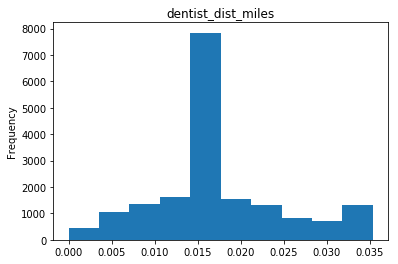


Shape of the data set before min max scaling :  (18079, 44)

Shape of the data set post min max scaling :  (18079, 44)


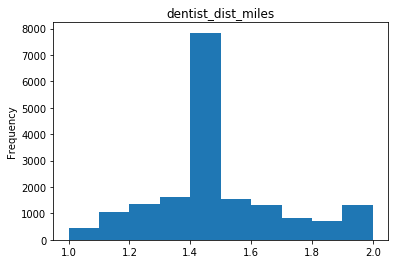


Train feature shape:  (14463, 43) (14463,)
Test feature shape:  (3616, 43) (3616,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.7267006805533355


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.7335491920392259
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.7335623854444427
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.7336227990676794
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6505580408225586
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
            

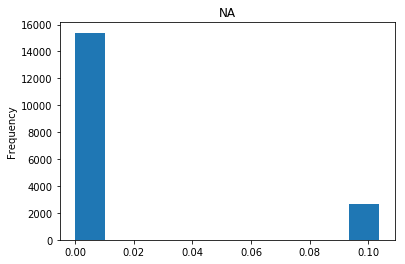


Shape of the data set before min max scaling :  (18079, 44)

Shape of the data set post min max scaling :  (18079, 44)


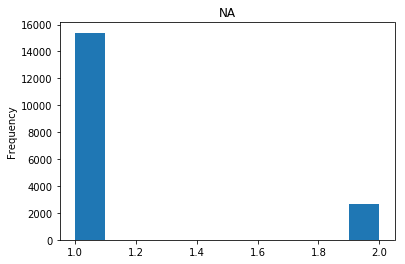


Train feature shape:  (16271, 43) (16271,)
Test feature shape:  (1808, 43) (1808,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.7201840137114064


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.7301400073309194
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.730188589846444
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.7300453710981055
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6404991089032214
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             

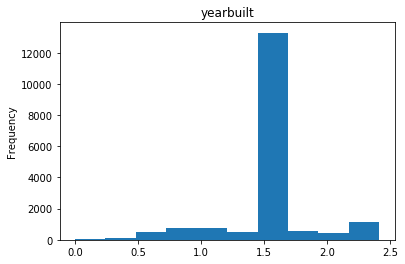


Shape of the data set before min max scaling :  (18079, 44)

Shape of the data set post min max scaling :  (18079, 44)


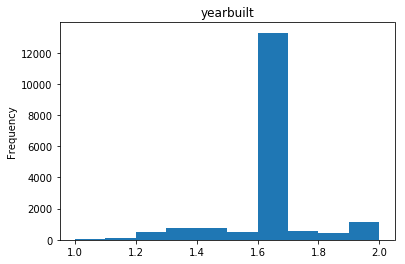


Train feature shape:  (16271, 43) (16271,)
Test feature shape:  (1808, 43) (1808,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.7195935723610324


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.7214830899537974
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.7215210865261814
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.7214314437198499
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6463466133184455
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
            

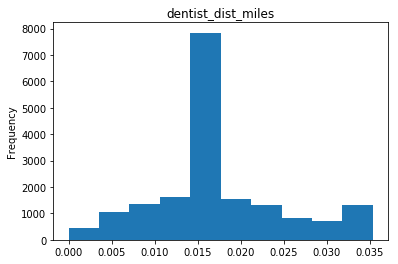


Shape of the data set before min max scaling :  (18079, 44)

Shape of the data set post min max scaling :  (18079, 44)


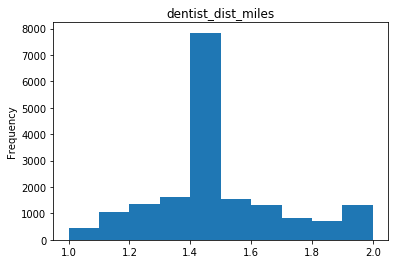


Train feature shape:  (16271, 43) (16271,)
Test feature shape:  (1808, 43) (1808,)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 0.7021724330296754


C:\Users\padmaraj.bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 0.7155978380970959
ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0) 0.7156075804242785
RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False) 0.7154257114047553
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) 0.6517048105394961
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
            

In [4]:
def experiment1():
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            boxCoxTranformation(preProcessTheData(removeOutlier(removeDuplicate(readTheData('TrainData_PA.csv'))))),
            random.randint(7,9)/10,
            random.randint(1,1000))
    clf_s = [SGDRegressor(), LassoCV(), ElasticNetCV(), RidgeCV(), \
         AdaBoostRegressor(), GradientBoostingRegressor(), \
         XGBRegressor()]#, SVR(kernel='linear')]

    for c in clf_s:
        c.fit(X_train, y_train)
        print(c,c.score(X_test, y_test))
    #printCorr(df)
    #printSkewness(df)
    return

for i in [1,2,3,4,5]:
    experiment1()

##### It is for sure GradientBoostingRegressor vs XGBRegressor avail a high validation score.

In [ ]:
def experiment2():
    df = removeOutlier(removeDuplicate(readTheData('TrainData_PA.csv')))
    df = boxCoxTranformation(preProcessTheData((df)))
    df=df.drop('CollegeGrads',axis=1)
    printCorr(df)
    #return
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            random.randint(7,9)/10,
            random.randint(1,1000))
    clf_s = [SGDRegressor(), LassoCV(), ElasticNetCV(), RidgeCV(), \
         AdaBoostRegressor(), GradientBoostingRegressor(), \
         XGBRegressor()]#, SVR(kernel='linear')]

    for c in clf_s:
        c.fit(X_train, y_train)
        print(c,c.score(X_test, y_test))
    #printCorr(df)
    #printSkewness(df)
    return

for i in [1,2,3,4,5]:
    experiment2()
#experiment2()

###### It is evident that co related feature removal did help to increase the score for all the regressor.

In [ ]:
def experiment3():
    df = removeOutlier(removeDuplicate(readTheData('TrainData_PA.csv')))
    df = boxCoxTranformation(preProcessTheData((df)))
    df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)
    printCorr(df)
    #return
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            random.randint(7,9)/10,
            random.randint(1,1000))
    clf_s = [SGDRegressor(), LassoCV(), ElasticNetCV(), RidgeCV(), \
         AdaBoostRegressor(), GradientBoostingRegressor(), \
         XGBRegressor()]#, SVR(kernel='linear')]

    for c in clf_s:
        c.fit(X_train, y_train)
        print(c,c.score(X_test, y_test))
    #printCorr(df)
    #printSkewness(df)
    return

for i in [1,2,3,4,5]:
    experiment3()

In [ ]:
#with scaling between 1,2
def experiment4():
    df = removeOutlier(removeDuplicate(readTheData('TrainData_PA.csv')))
    df = boxCoxTranformation(preProcessTheData((df)))
    df=df.drop(['CollegeGrads','Census_Vacancy'],axis=1)
    printCorr(df)
    #return
    X_train, y_train, X_test, y_test = returnTrainTestSet(
            df,
            random.randint(7,9)/10,
            random.randint(1,1000))
    clf_s = [SGDRegressor(), LassoCV(), ElasticNetCV(), RidgeCV(), \
         AdaBoostRegressor(), GradientBoostingRegressor(), \
         XGBRegressor()]#, SVR(kernel='linear')]

    for c in clf_s:
        c.fit(X_train, y_train)
        print(c,c.score(X_test, y_test))
    #printCorr(df)
    #printSkewness(df)
    return

for i in [1,2,3,4,5]:
    experiment4()

##### Scaling between 0-1 and 1-2 has no impact 

What next?
1. rent_per_bed
2. confirm if 2 features removal has increased the score?
3. transforming boolean data types
4. transforming boolean data types and shrinking feature to PCA(10)
5. PCA(10) right away
6. with no rent transformation with practical use of modelling in mind - rent
7. with no rent transformation with practical use of modelling in mind - rent per bed
8. can we have have related featues(3 categories) forming 3 features and then perform rent predictions.
9. removing time feature: lotsize, time
10. neural network {there would so many combination here}

Let us re-order the above list:
* confirm if 2 features removal has increased the score?
* removing time feature: lotsize, time
* with no rent transformation with practical use of modelling in mind - rent
* rent_per_bed
* with no rent transformation with practical use of modelling in mind - rent per bed
* PCA(10) right away
* transforming boolean data types
* transforming boolean data types and shrinking feature to PCA(10)
* can we have have related featues(3 categories) forming 3 features and then perform rent predictions.
* neural network {there would so many combination here}